<a href="https://colab.research.google.com/github/xingyug/ecommerce_behaviour_analysis/blob/main/ecommerce_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67542878 entries, 0 to 67542877
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB
None
         product_id   category_id         price       user_id
count  6.754288e+07  6.754288e+07  6.754288e+07  6.754288e+07
mean   1.762081e+07  2.179056e+18  2.747987e+02  5.481210e+08
std    2.730071e+07  8.166665e+16  3.480468e+02  2.859330e+07
min    1.000544e+06  2.053014e+18  0.000000e+00  2.951588e+07
25%    1.005266e+06  2.053014e+18  6.149000e+01  5.188418e+08
50%    5.300079e+06  2.232732e+18  1.544200e+02  5.468766e+08
75%    2.140391e+07  2.232732e+18  3.320300e+02  5.739862e+08
max    1.000645

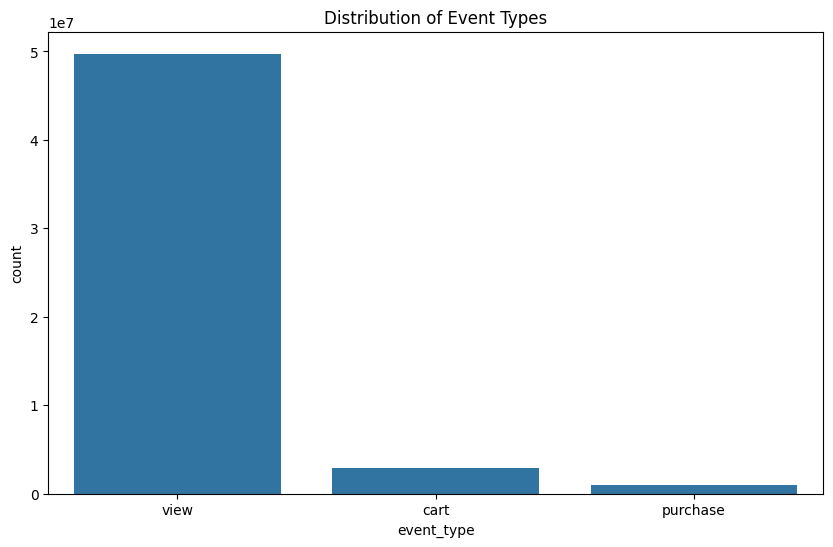

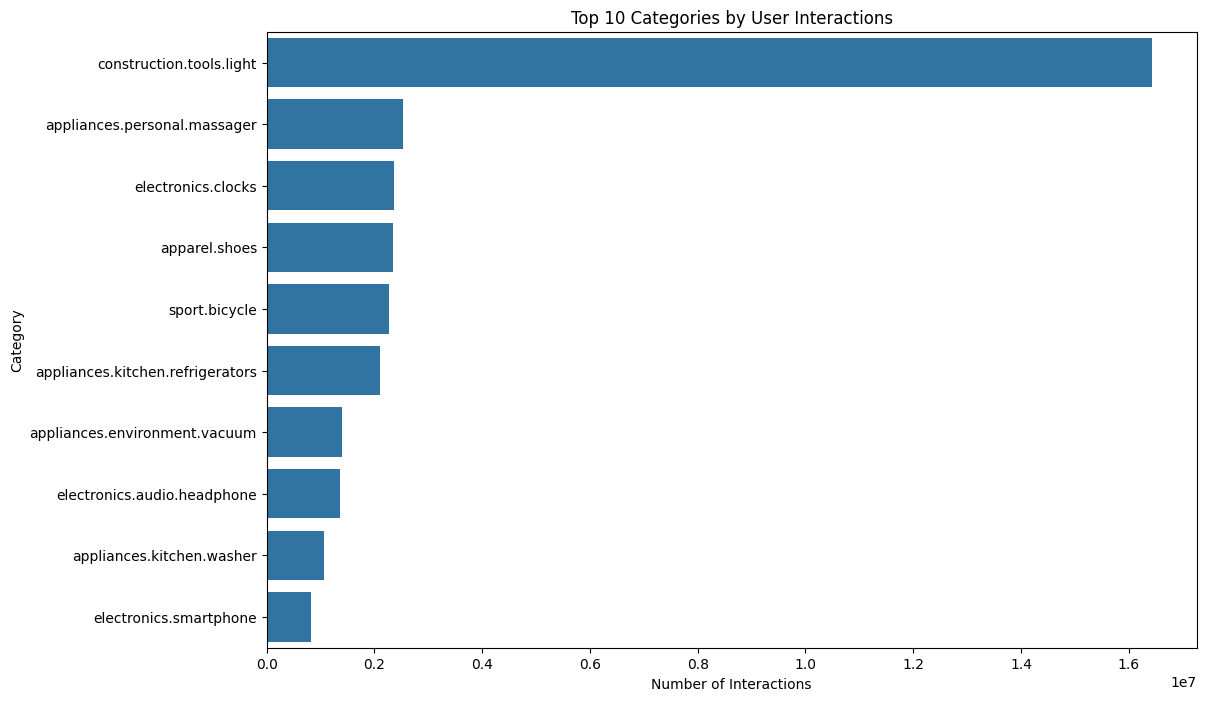

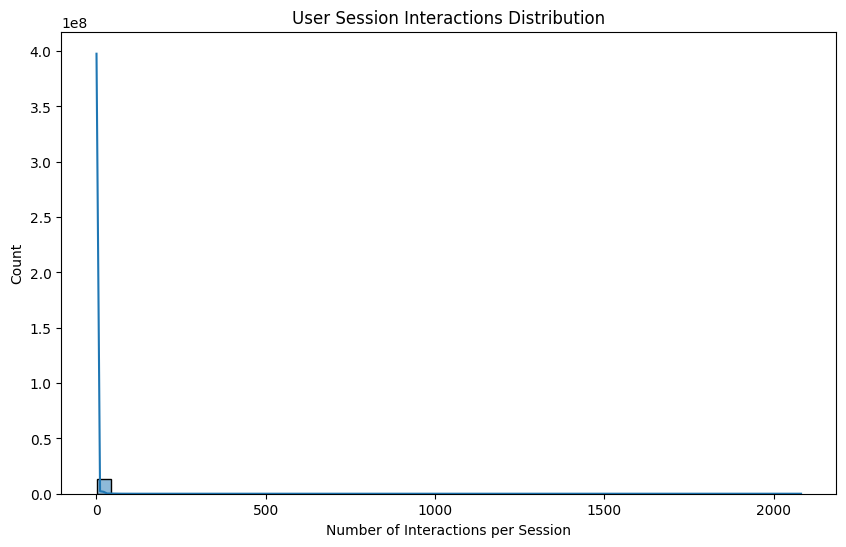

Conversion Rate: 2.03%


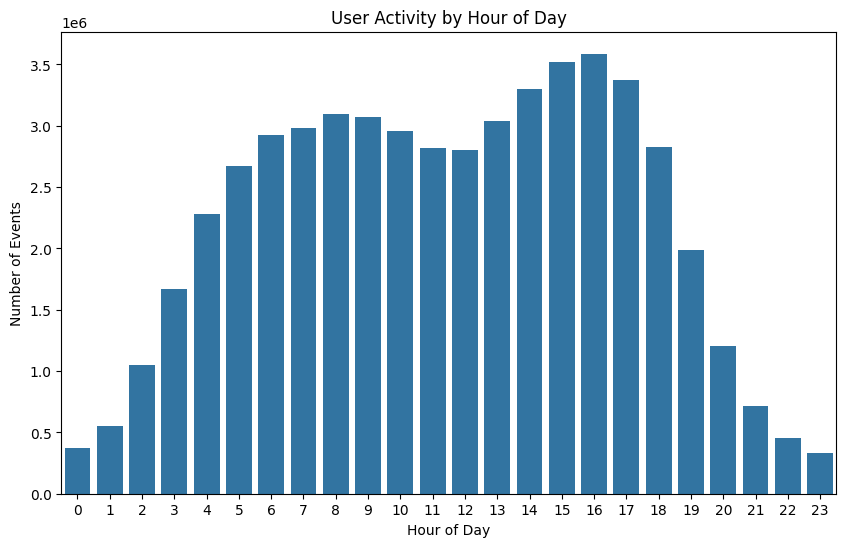

Num GPUs Available:  1
GPU device in use: /device:GPU:0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
335030/335037 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.2965
Epoch 1: val_loss improved from inf to 0.29538, saving model to /content/drive/MyDrive/Datasets/eCommerce_behavior_model.keras
335037/335037 ━━━━━━━━━━━━━━━━━━━━ 1327s 4ms/step - accuracy: 0.9279 - loss: 0.2965 - val_accuracy: 0.9279 - val_loss: 0.2954
Epoch 2/50
335024/335037 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9280 - loss: 0.2954
Epoch 2: val_loss did not improve from 0.29538
335037/335037 ━━━━━━━━━━━━━━━━━━━━ 1336s 4ms/step - accuracy: 0.9280 - loss: 0.2954 - val_accuracy: 0.9279 - val_loss: 0.2959
Epoch 3/50
184372/335037 ━━━━━━━━━━━━━━━━━━━━ 9:18 4ms/step - accuracy: 0.9280 - loss: 0.2958

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Google Drive and Colab imports
from google.colab import drive

# Step 1: Mount Google Drive
# drive.mount('/content/drive')

# Define the file paths for the dataset and model saving
data_folder = '/content/drive/MyDrive/Datasets/eCommerce behavior data from multi category store/'
model_path = '/content/drive/MyDrive/Datasets/eCommerce_behavior_model.keras'
file = '2019-Dec.csv'

# Step 2: Load the Dataset
file_path = data_folder + file
df = pd.read_csv(file_path)  # Load the entire dataset

# Step 3: Basic Exploration
print(df.info())  # Get info about columns and data types
print(df.describe())  # Get a statistical summary of numeric features
print(df.head())  # Display the first few rows

# Step 4: Handling Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
df.dropna(inplace=True)

# Step 5: Data Analysis and Visualization
# Distribution of Event Types (view, cart, purchase)
plt.figure(figsize=(10, 6))
sns.countplot(x='event_type', data=df)
plt.title('Distribution of Event Types')
plt.show()

# Step 6: Top Categories Analysis
# Top 10 categories based on user interactions
top_categories = df['category_code'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories by User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Category')
plt.show()

# Step 7: User Behavior Analysis
# Extracting user session interactions
session_interactions = df.groupby('user_session')['event_type'].count().reset_index()
session_interactions.columns = ['user_session', 'interaction_count']

plt.figure(figsize=(10, 6))
sns.histplot(session_interactions['interaction_count'], bins=50, kde=True)
plt.title('User Session Interactions Distribution')
plt.xlabel('Number of Interactions per Session')
plt.show()

# Step 8: Conversion Rate Analysis
# Analyzing the conversion rate from 'view' to 'purchase'
total_views = df[df['event_type'] == 'view'].shape[0]
total_purchases = df[df['event_type'] == 'purchase'].shape[0]
conversion_rate = (total_purchases / total_views) * 100

print(f'Conversion Rate: {conversion_rate:.2f}%')

# Step 9: Time-based Analysis
# Convert the event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour

# Plotting activity by hour of day
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, order=range(24))
plt.title('User Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

# Step 10: Neural Network Model for Prediction
# Encoding categorical features
le_event_type = LabelEncoder()
df['event_type_encoded'] = le_event_type.fit_transform(df['event_type'])

# Selecting features and target
df_model = df[['price', 'category_id', 'event_type_encoded', 'hour']]
X = df_model.drop('event_type_encoded', axis=1)
y = df_model['event_type_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('GPU device in use:', tf.test.gpu_device_name())
else:
    print("No GPU found. Using CPU.")

# Specify the strategy for GPU usage
strategy = tf.distribute.MirroredStrategy()

# Use the strategy scope to build and compile the model
with strategy.scope():
    # Check if a model already exists and load it, otherwise create a new model
    if os.path.exists(model_path):
        model = load_model(model_path)
        print("Loaded existing model from disk.")
    else:
        # Building the Neural Network Model
        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(3, activation='softmax'))  # 3 classes for event_type: view, cart, purchase

        # Compile the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Checkpoint to save the model after each epoch
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')



In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
import os
import shutil

# Encoding categorical features
le_event_type = LabelEncoder()
df['event_type_encoded'] = le_event_type.fit_transform(df['event_type'])

# Selecting features and target
selected_columns = ['price', 'category_id', 'event_type_encoded']
if 'hour' in df.columns:
    selected_columns.append('hour')
df_model = df[selected_columns]
X = df_model.drop('event_type_encoded', axis=1)
y = df_model['event_type_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check if a model already exists and load it, otherwise create a new model
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Loaded existing model from disk.")
else:
    # Building the Neural Network Model
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))  # Reduced units for faster training
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 classes for event_type: view, cart, purchase

    # Compile the model with mixed precision and custom learning rate
    from tensorflow.keras import mixed_precision
    mixed_precision.set_global_policy('mixed_float16')

    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Early stopping to avoid long training times when no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

# Checkpoint to save the model after each epoch locally
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1, save_weights_only=False)

# Create a tf.data dataset for more efficient data loading
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=5000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)  # Reduced batch size for stability

# Train the model
model.fit(train_dataset, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, lr_scheduler, reduce_lr, early_stopping], verbose=1)

# Save the best model to Google Drive
shutil.copy(model_path, final_model_path)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')



Epoch 1/50
515710/670074 ━━━━━━━━━━━━━━━━━━━━ 3:38 1ms/step - accuracy: 0.9272 - loss: 0.2983

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
